In [2]:
from unityagents import UnityEnvironment
import numpy as np

from collections import deque
import torch
from matplotlib import pyplot as plt

from ddpg_agent import Agent

agent = Agent(state_size=33, action_size=4, seed=0)
torch.cuda.is_available()

True

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
d:\Programowanie\Anaconda\envs\drl2\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 0	Average Score: 0.46
Episode 100	Average Score: 0.58
Episode 200	Average Score: 0.63
Episode 300	Average Score: 0.59
Episode 400	Average Score: 0.46
Episode 500	Average Score: 0.34
Episode 600	Average Score: 0.31
Episode 700	Average Score: 0.36
Episode 800	Average Score: 0.29
Episode 900	Average Score: 0.33
Episode 999	Average Score: 0.30

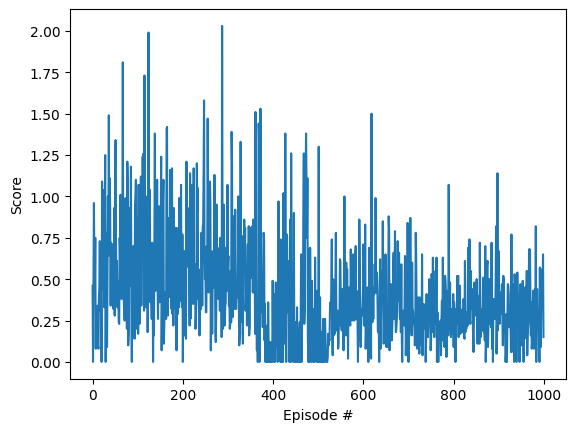

In [3]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_one_agent\Reacher.exe')
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

def use_ddpg(n_episodes=1000, t_max=1000):
    scores = []
    scores_window = deque(maxlen=100)

    for i_episode in range(n_episodes):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(1)
        for i in range(t_max):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            rewards = env_info.rewards
            dones = env_info.local_done
            next_states = env_info.vector_observations
            agent.step(states, actions, rewards, next_states, dones)
            score += rewards
            states = next_states
            if np.any(dones):
                break

        scores_window.append(np.mean(score))
        scores.append(np.mean(score))

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=31.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_network_target.state_dict(), 'checkpoint.pth')
            torch.save(agent.critic_network_target.state_dict(), 'checkpoint.pth')
            break

    torch.save(agent.actor_network_target.state_dict(), 'finished.pth')
    torch.save(agent.critic_network_target.state_dict(), 'finished.pth')

    return scores

scores = use_ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()